
# Set up

In [ ]:
# import libraries
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [ ]:
# load the training data
train = pd.read_csv('train.csv')
train.head(2)

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045


# Check for image existance
For each input in the image column, is there a matching image in the train_image directory?

In [ ]:
path = 'train_images/'

In [ ]:
# simple check - results can be unstable
# after a timeout, just re-run
os.path.exists(path+'0000a68812bc7e98c42888dfb1c07da0.jpg')

False

In [ ]:
# simple check
os.path.isfile(path+train['image'][123])

True

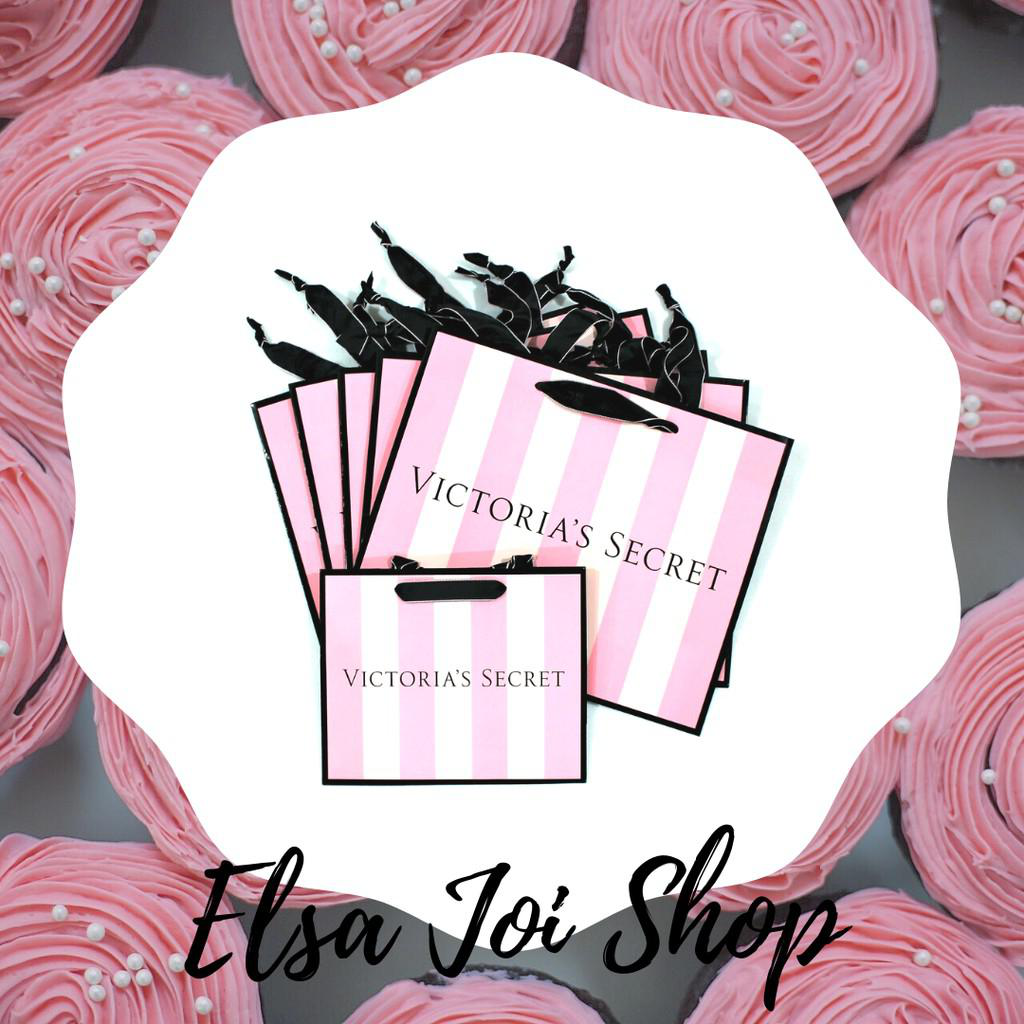

In [ ]:
# let's see the image
Image.open(path+train['image'][0])

In [ ]:
missing_image = []
for i in range(train.shape[0]):
  if os.path.isfile(path+train['image'][i]) != True:
    missing_image.append(i)
missing_image

[]

All the images in the image column exists in the train_image directory.

# Convert images to matrix
As the matrix gets larger, the code will slow down. Initial dataset will be subsetted to make it manageable. 

In [ ]:
# define function that converts image to array
def load_image(image_path):
    img = Image.open(path+image_path, 'r')
    fixed_size = (128, 128) # in case of modeling with ResNet50 
    img = img.resize(fixed_size)
    img_array = np.array(img)
    flat_array = img_array.flatten()
    return flat_array

In [ ]:
df1 = train.head(6000)
df2 = train.iloc[6000:12000, :]
df3 = train.iloc[12000:18000, :]
df4 = train.iloc[18000:24000, :]
df5 = train.iloc[24000:, :]

In [ ]:
matrix1 = load_image(df1['image'][0])
for i in range(1, df1.shape[0]):
  flat_array = load_image(df1['image'][i])
  matrix1 = np.vstack([matrix1, flat_array])
  if i % 1000 == 0:
    print(i)

df1 = pd.DataFrame(matrix1)
df_out1 = df1.astype('uint8')

with open('images.csv', 'w') as f:
  df_out1.to_csv(f)

In [ ]:
matrix2 = load_image(df2['image'][6000])
for i in range(6001, 6000+df2.shape[0]):
  flat_array = load_image(df2['image'][i])
  matrix2 = np.vstack([matrix2, flat_array])
  if i % 1000 == 0:
    print(i)

df2 = pd.DataFrame(matrix2)
df_out2 = df2.astype('uint8')

with open('images2.csv', 'w') as f:
  df_out2.to_csv(f)

In [ ]:
matrix3 = load_image(df3['image'][12000])
for i in range(12001, 12000+df3.shape[0]):
  flat_array = load_image(df3['image'][i])
  matrix3 = np.vstack([matrix3, flat_array])
  if i % 1000 == 0:
    print(i)

df3 = pd.DataFrame(matrix3)
df_out3 = df3.astype('uint8')

with open('images3.csv', 'w') as f:
  df_out3.to_csv(f)

In [ ]:
matrix4 = load_image(df4['image'][18000])
for i in range(18001, 18000+df4.shape[0]):
  flat_array = load_image(df4['image'][i])
  matrix4 = np.vstack([matrix4, flat_array])
  if i % 1000 == 0:
    print(i)

df4 = pd.DataFrame(matrix4)
df_out4 = df4.astype('uint8')

with open('images4.csv', 'w') as f:
  df_out4.to_csv(f)

In [ ]:
matrix5 = load_image(df5['image'][24000])
for i in range(24001, 34250):
  flat_array = load_image(df5['image'][i])
  matrix5 = np.vstack([matrix5, flat_array])
  if i % 1000 == 0:
    print(i)

df5 = pd.DataFrame(matrix5)
df_out5 = df5.astype('uint8')

with open('images5.csv', 'w') as f:
  df_out5.to_csv(f)

Resulting dataframes can be concatented in excel afterwards.

# Test data type

In [ ]:
a = np.array([255, 255, 255])
df = pd.DataFrame(a)
df2 = df.astype("uint8")
df2 

In [ ]:
df2[0].dtype